<a href="https://colab.research.google.com/github/yasminhegy-byte/now-ui-kit-react/blob/main/paper2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import, EDA, split, train

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.inspection import (PartialDependenceDisplay, permutation_importance)
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from sklearn.tree import export_graphviz


In [ ]:
df = pd.read_csv('train.csv')
print(df.shape)

(44720, 28)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44720 non-null  object 
 1   Customer_ID               44720 non-null  object 
 2   Month                     44720 non-null  object 
 3   Name                      40262 non-null  object 
 4   Age                       44720 non-null  object 
 5   SSN                       44720 non-null  object 
 6   Occupation                44720 non-null  object 
 7   Annual_Income             44720 non-null  object 
 8   Monthly_Inhand_Salary     38055 non-null  float64
 9   Num_Bank_Accounts         44719 non-null  float64
 10  Num_Credit_Card           44719 non-null  float64
 11  Interest_Rate             44719 non-null  float64
 12  Num_of_Loan               44719 non-null  object 
 13  Type_of_Loan              39664 non-null  object 
 14  Delay_

In [ ]:
df.isna().sum

<bound method DataFrame.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
44715  False        False  False  False  False  False       False   
44716  False        False  False  False  False  False       False   
44717  False        False  False  False  False  False       False   
44718  False        False  False  False  False  False       False   
44719  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                   True              False  ...   
2              False                   True              False  ...   
3              False                   True              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
44715          False                  False              False  ...   
44716          False                  False              False  ...   
44717          False                   True              False  ...   
44718          False                  False              False  ...   
44719          False                   True               True  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
44715       False             False                     False   
44716       False             False                     False   
44717       False             False                     False   
44718       False             False                     False   
44719        True              True                      True   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                    True                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
44715               False                  False                False   
44716               False                  False                False   
44717               False                  False                False   
44718               False                  False                False   
44719                True                   True                 True   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
44715                    False              False            False   
44716                    False              False            False   

drop unwanted columns (name)

In [ ]:
df = df.drop(['Name'], axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isna().sum()


,0
ID,0
Customer_ID,0
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


In [ ]:
df.shape

(26392, 27)

categories of Credit_Score

In [ ]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

drop unwanted coulmns

In [ ]:
columns =  ["ID", "Customer_ID", "SSN"]
df = df.drop(columns=columns)


Clean non numric characters and convert column to numeric type coercing invalid values to NaN

In [ ]:
numeric_columns = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace("[^0-9.]", "", regex=True), errors='coerce')

In [ ]:
df = df.dropna(how='any')
df.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Split Data for Training

In [ ]:
target_col = 'Credit_Score'
y = df[target_col]
X = df.select_dtypes(exclude=['object'])

y_encoded = pd.get_dummies(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (15501, 16), (15501, 3)
Validation: (5167, 16), (5167, 3)
Test: (5167, 16), (5167, 3)


In [ ]:
X_train.isna().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#Paper2

ref : https://onlinelibrary.wiley.com/doi/full/10.1155/2021/9222617

 Random Forest Model

Train

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation

In [ ]:
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_test_pred = rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

Validation Accuracy: 0.7245984130056126
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       861
           1       0.78      0.75      0.77      1604
           2       0.82      0.75      0.78      2702

   micro avg       0.80      0.72      0.76      5167
   macro avg       0.79      0.69      0.74      5167
weighted avg       0.80      0.72      0.76      5167
 samples avg       0.72      0.72      0.72      5167


Test Accuracy: 0.7315657054383589


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Importance gini-based

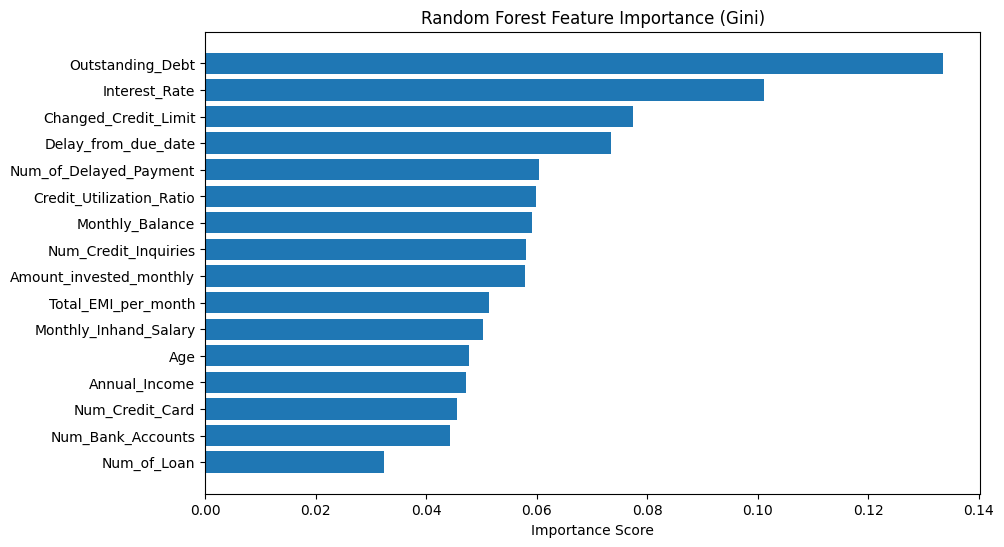

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("Random Forest Feature Importance (Gini)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

Permutation Importance

In [ ]:
result = permutation_importance(
    rf, X_val, y_val, n_repeats=10, random_state=42
)

perm_importance = result.importances_mean
perm_df = pd.DataFrame({"Feature": feature_names, "Importance": perm_importance})
perm_df = perm_df.sort_values("Importance", ascending=False)

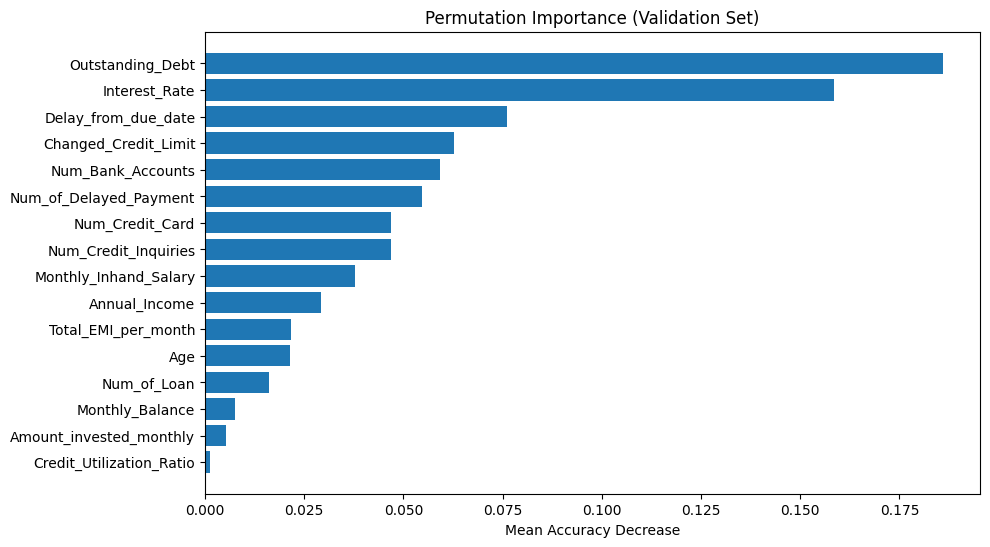

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(perm_df["Feature"], perm_df["Importance"])
plt.title("Permutation Importance (Validation Set)")
plt.xlabel("Mean Accuracy Decrease")
plt.gca().invert_yaxis()
plt.show()

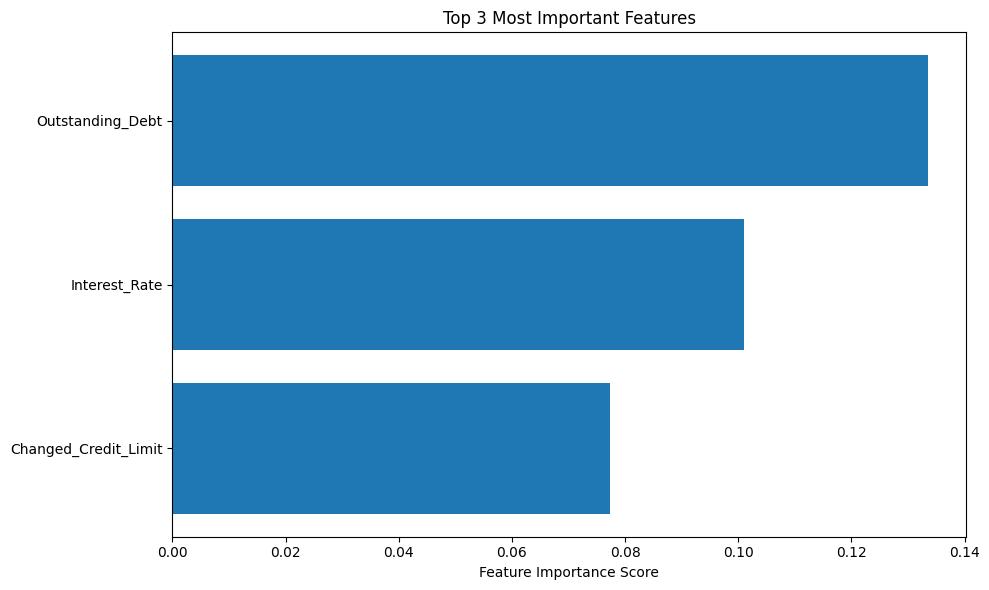

In [ ]:
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
top_features = X_val.columns[sorted_idx[:3]]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), importances[sorted_idx[:3]][::-1], align='center')
plt.yticks(range(len(top_features)), top_features[::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 3 Most Important Features")
plt.tight_layout()
plt.show()

In [ ]:
print(rf.classes_)


[array([False,  True]), array([False,  True]), array([False,  True])]


In [ ]:
label_idx = 0
y_train_label = y_train.iloc[:, label_idx]
y_val_label = y_val.iloc[:, label_idx]

rf_single = RandomForestClassifier(n_estimators=100, random_state=42)
rf_single.fit(X_train, y_train_label)

 Plot PDP for top features


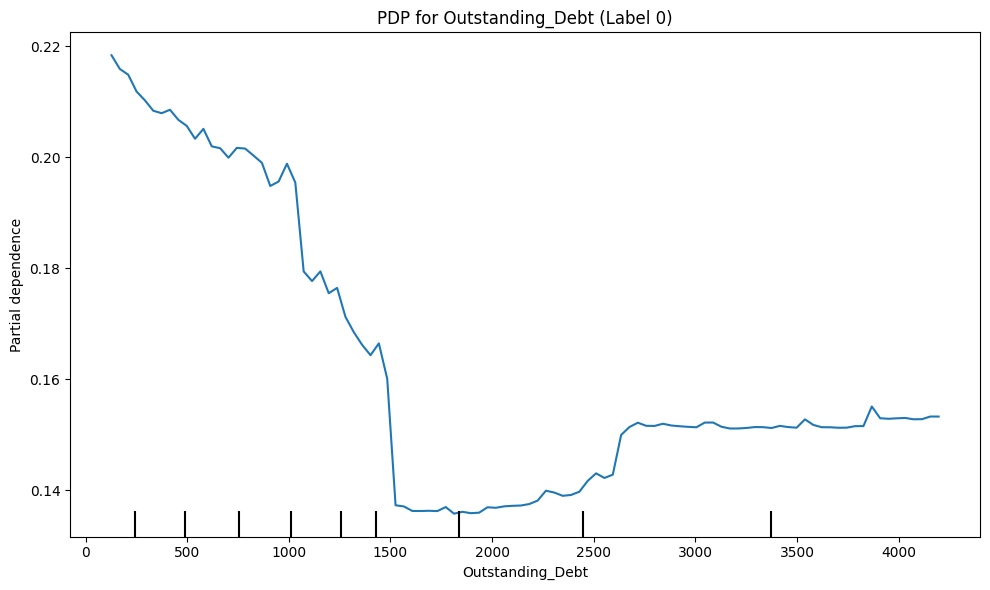

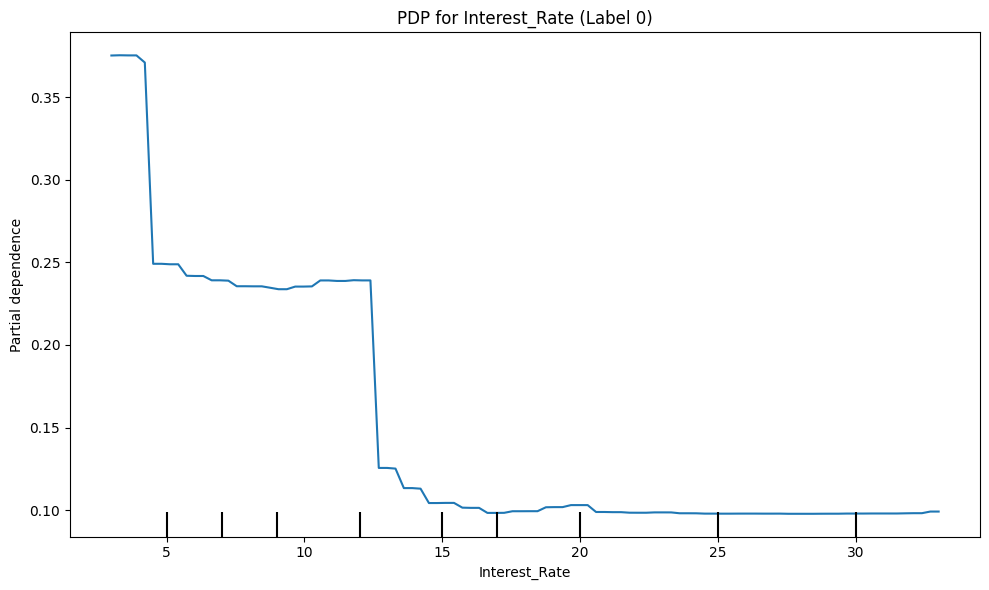

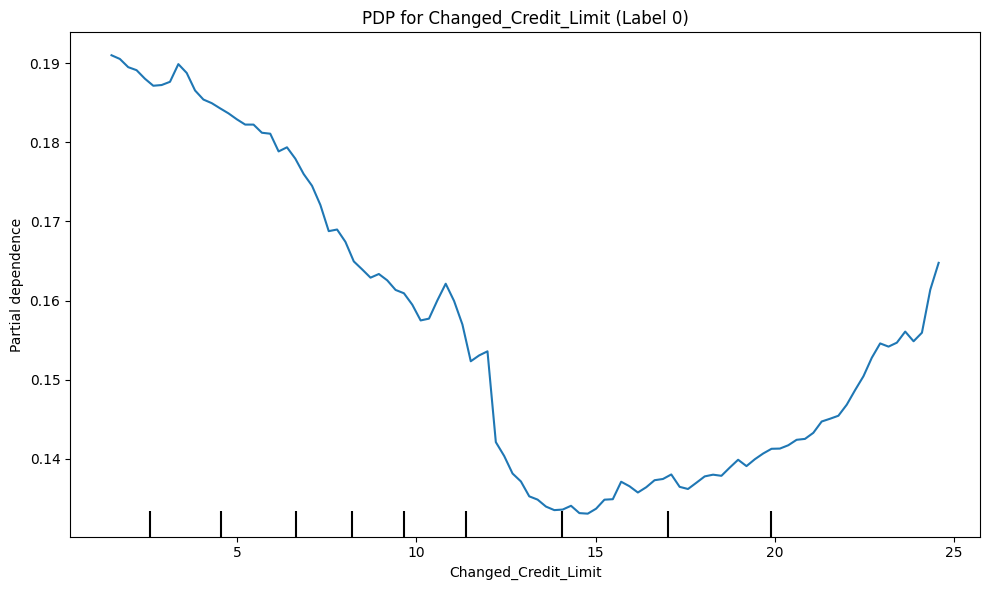

In [ ]:
for feature in top_features:
    try:
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(
            rf_single,
            X_val,
            features=[feature],
            kind='average',  # <- this enables PDP
            ax=ax
        )
        plt.title(f'PDP for {feature} (Label {label_idx})')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Couldn't plot PDP for {feature}, label {label_idx}: {str(e)}")


ICE

In [ ]:
label_idx = 0
y_train_label = y_train.iloc[:, label_idx]
y_val_label = y_val.iloc[:, label_idx]

rf_single = RandomForestClassifier(n_estimators=100, random_state=42)
rf_single.fit(X_train, y_train_label)

RandomForestClassifier(random_state=42)

Plot ICE for top features

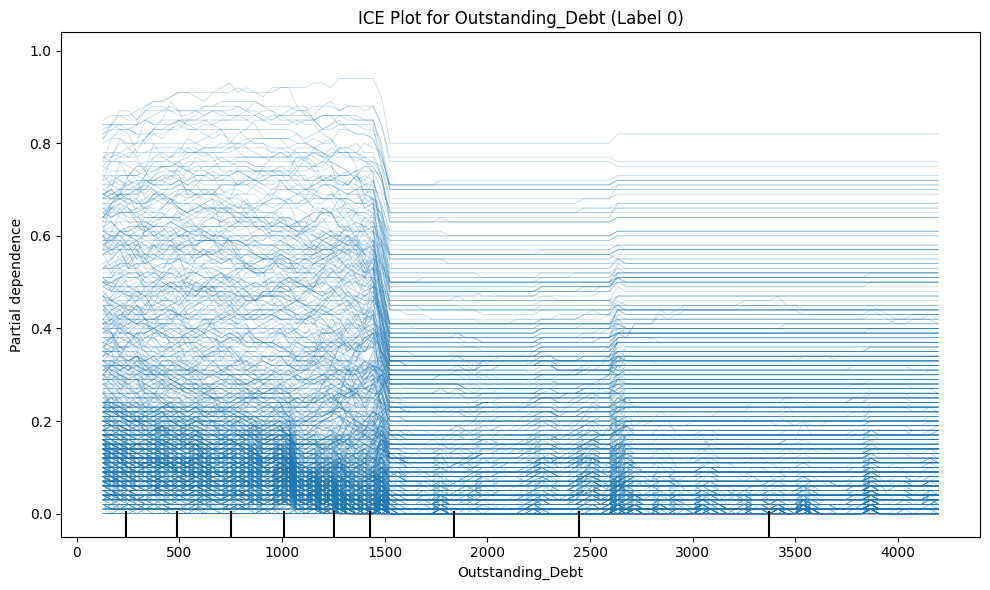

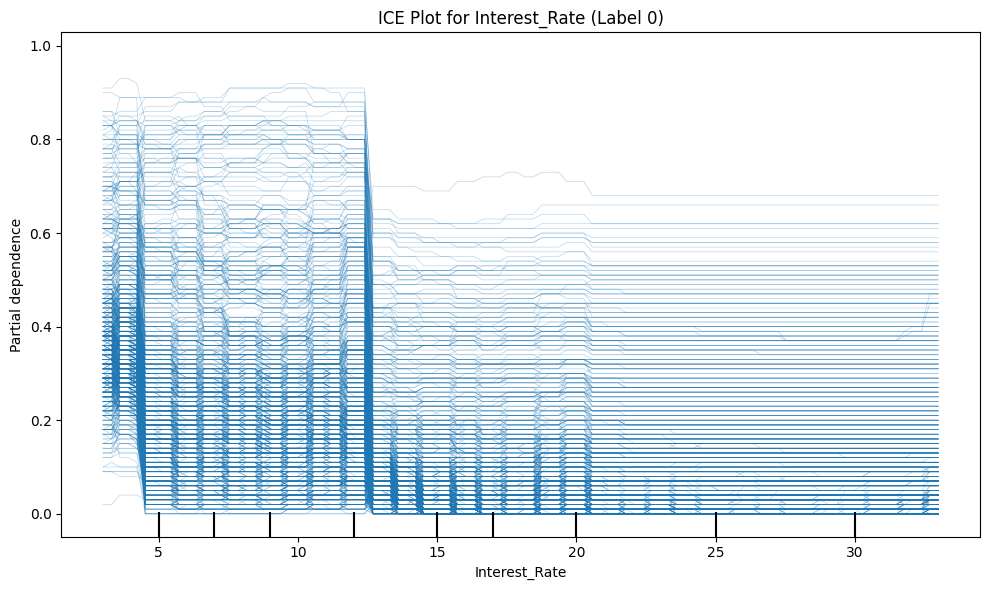

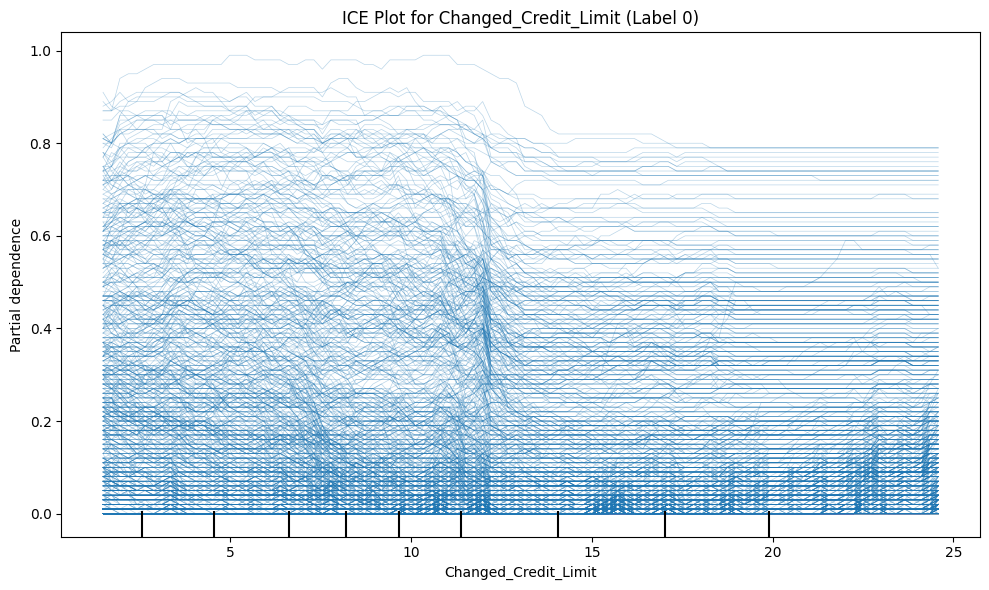

In [ ]:
for feature in top_features:
    try:
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(
            rf_single,
            X_val,
            features=[feature],
            kind='individual',
            ax=ax
        )
        plt.title(f'ICE Plot for {feature} (Label {label_idx})')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Couldn't plot ICE for {feature}, label {label_idx}: {str(e)}")


decision paths for RF

In [ ]:
sample_idx = 0
sample = X_val.iloc[[sample_idx]]

tree = rf.estimators_[0]
decision_path = tree.decision_path(sample)

print("Decision path for sample:")
for node_id in decision_path.indices:
    if tree.tree_.children_left[node_id] != tree.tree_.children_right[node_id]:
        feature = X_val.columns[tree.tree_.feature[node_id]]
        threshold = tree.tree_.threshold[node_id]
        value = sample[feature].values[0]
        print(f"Node {node_id}: {feature} <= {threshold:.2f}? (Value: {value:.2f})")

Decision path for sample:
Node 0: Interest_Rate <= 20.50? (Value: 32.00)
Node 3186: Num_of_Loan <= 7.50? (Value: 7.00)
Node 3187: Monthly_Inhand_Salary <= 7227.91? (Value: 2184.58)
Node 3188: Num_Credit_Inquiries <= 5.50? (Value: 14.00)
Node 3234: Interest_Rate <= 53.50? (Value: 32.00)
Node 3235: Monthly_Balance <= 503.90? (Value: 294.96)
Node 3236: Num_of_Loan <= 4.50? (Value: 7.00)
Node 3410: Annual_Income <= 8329.12? (Value: 28230.92)
Node 3436: Num_of_Delayed_Payment <= 13.50? (Value: 19.00)
Node 3516: Outstanding_Debt <= 2513.56? (Value: 2989.13)
Node 3644: Total_EMI_per_month <= 68.83? (Value: 132.48)
Node 3720: Monthly_Inhand_Salary <= 1135.61? (Value: 2184.58)
Node 3726: Delay_from_due_date <= 28.50? (Value: 51.00)
Node 3784: Total_EMI_per_month <= 75.04? (Value: 132.48)
Node 3786: Num_Credit_Inquiries <= 11.50? (Value: 14.00)
Node 3860: Num_Credit_Inquiries <= 497.50? (Value: 14.00)
Node 3861: Changed_Credit_Limit <= 30.38? (Value: 25.17)
Node 3862: Outstanding_Debt <= 4651.23

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [ ]:
sample_idx = 0  #sample
sample = X_val.iloc[[sample_idx]]
tree = rf.estimators_[0]

decision_path = tree.decision_path(sample)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


plot

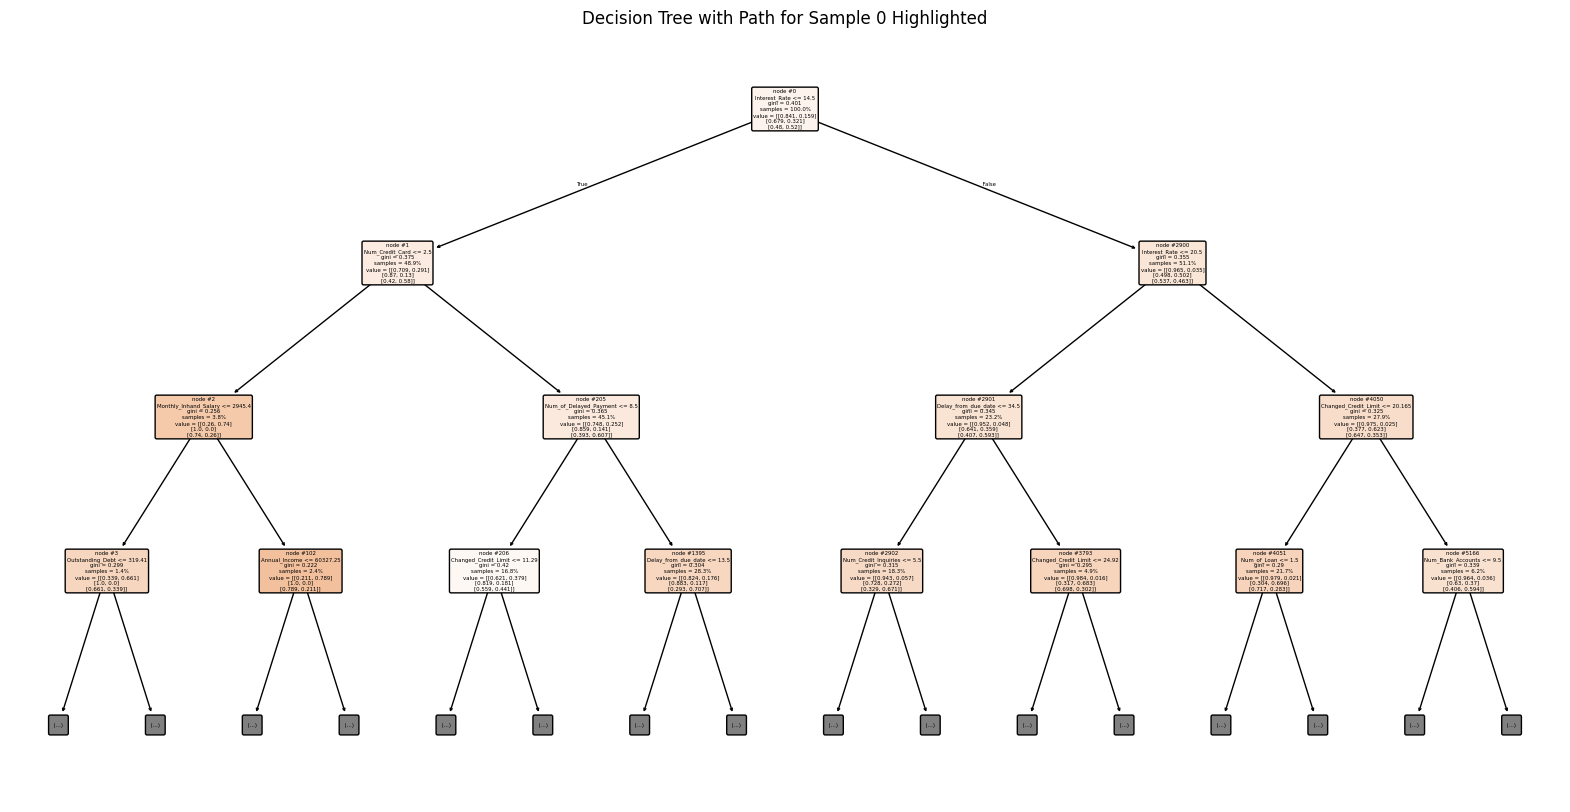

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X_val.columns,
          class_names=[str(c) for c in tree.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          node_ids=True,
          max_depth=3)

for node_id in decision_path.indices:
    plt.gca().get_xticks()
    plt.gca().get_yticks()
    plt.scatter([], [], color='red', s=100)

plt.title(f"Decision Tree with Path for Sample {sample_idx} Highlighted")
plt.show()


Detailed Decision Path

In [ ]:
print("\nDetailed Decision Path:")
for node_id in decision_path.indices:
    if tree.tree_.children_left[node_id] != tree.tree_.children_right[node_id]:
        feature = X_val.columns[tree.tree_.feature[node_id]]
        threshold = tree.tree_.threshold[node_id]
        value = sample[feature].values[0]
        decision = "YES" if value <= threshold else "NO"
        print(f"Node {node_id}: Is {feature} <= {threshold:.2f}? ({decision}) [Value: {value:.2f}]")

dot_data = export_graphviz(tree,
                          feature_names=X_val.columns,
                          class_names=[str(c) for c in tree.classes_],
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          proportion=True,
                          max_depth=3)

graph = graphviz.Source(dot_data)
graph.render(filename=f'decision_path_sample_{sample_idx}', format='png', cleanup=True)
print("Saved decision path visualization as 'decision_path_sample_0.png'")


Detailed Decision Path:
Node 0: Is Interest_Rate <= 14.50? (NO) [Value: 19.00]
Node 2900: Is Interest_Rate <= 20.50? (YES) [Value: 19.00]
Node 2901: Is Delay_from_due_date <= 34.50? (NO) [Value: 54.00]
Node 3793: Is Changed_Credit_Limit <= 24.92? (YES) [Value: 3.40]
Node 3794: Is Num_of_Loan <= 5.50? (NO) [Value: 7.00]
Node 3858: Is Monthly_Balance <= 86.61? (NO) [Value: 189.63]
Node 3862: Is Total_EMI_per_month <= 183.42? (YES) [Value: 88.00]
Node 3863: Is Outstanding_Debt <= 2089.90? (YES) [Value: 1362.04]
Node 3864: Is Amount_invested_monthly <= 20.45? (NO) [Value: 159.95]
Node 3866: Is Num_of_Delayed_Payment <= 25.50? (YES) [Value: 24.00]
Node 3867: Is Num_Bank_Accounts <= 9.50? (NO) [Value: 10.00]
Node 3869: Is Delay_from_due_date <= 51.50? (NO) [Value: 54.00]
Saved decision path visualization as 'decision_path_sample_0.png'


Shap: this takes much time in RF

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val, feature_names=feature_names)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_val.iloc[0, :])